In [1]:
import numpy as np
import os
import tensorflow as tf

In [3]:
from PIL import Image

In [118]:
dir_list = os.listdir("data/train")

In [119]:
train_dirty = []
train_clean = []
for im in dir_list:
    dirty = np.asarray(Image.open("data/train/"+im), dtype=np.uint8)
    clean = np.asarray(Image.open("data/train_cleaned/"+im), dtype=np.uint8)
    xoff = 540 - dirty.shape[0]
    yoff = 540 - dirty.shape[1]
    dirty = np.pad(dirty, [(0,xoff), (0,yoff)], mode="constant")
    clean = np.pad(clean, [(0,xoff), (0,yoff)], mode="constant")
    train_dirty.append(dirty.reshape(540,540,1))
    train_clean.append(clean.reshape(540,540,1))

In [120]:
train_dirty = np.array(train_dirty)
train_dirty.shape

(144, 540, 540, 1)

In [121]:
train_clean = np.array(train_clean)
train_clean.shape

(144, 540, 540, 1)

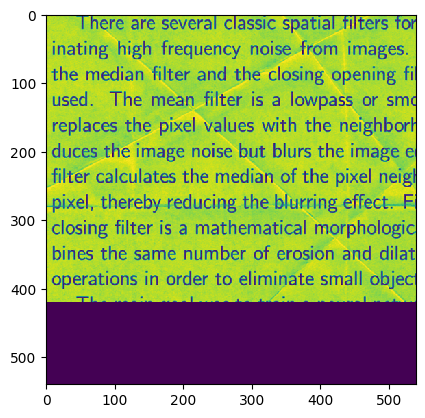

In [122]:
%matplotlib inline 
from matplotlib import pyplot as plt
plt.imshow(train_dirty[10].reshape(540,540), interpolation='nearest')
plt.show()


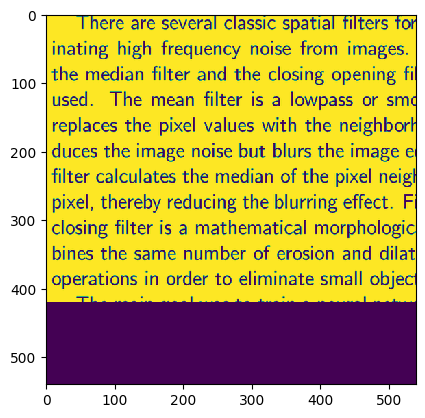

In [123]:
plt.imshow(train_clean[10], interpolation='nearest')
plt.show()

In [77]:
encoder_decoder = tf.keras.models.Sequential([
    # encoder
    tf.keras.layers.Input(shape=(540,540,1)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
    # decoder
    tf.keras.layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='softplus', padding='same'),
    ])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 2.0))
    
encoder_decoder.compile(
        loss = ssim_loss,
        #loss="mean_squared_error",
        metrics = ["accuracy"],
        optimizer = optimizer
        )
encoder_decoder.output_shape

(None, 540, 540, 1)

In [78]:
encoder_decoder.fit(train_dirty, train_clean, batch_size=32, epochs=10,validation_split=.1)

Epoch 1/10
5/5 [==============================] - 42s 8s/step - loss: 0.9977 - accuracy: 0.0099 - val_loss: 0.9760 - val_accuracy: 0.0044
Epoch 2/10
5/5 [==============================] - 47s 9s/step - loss: 0.9545 - accuracy: 0.0032 - val_loss: 0.8491 - val_accuracy: 0.0031
Epoch 3/10
5/5 [==============================] - 46s 9s/step - loss: 0.8367 - accuracy: 0.0030 - val_loss: 0.7821 - val_accuracy: 0.0032
Epoch 4/10
5/5 [==============================] - 46s 9s/step - loss: 0.7832 - accuracy: 0.0036 - val_loss: 0.7364 - val_accuracy: 0.0044
Epoch 5/10
5/5 [==============================] - 44s 8s/step - loss: 0.7491 - accuracy: 0.0038 - val_loss: 0.7177 - val_accuracy: 0.0045
Epoch 6/10
5/5 [==============================] - 44s 8s/step - loss: 0.7333 - accuracy: 0.0049 - val_loss: 0.7078 - val_accuracy: 0.0080
Epoch 7/10
5/5 [==============================] - 45s 8s/step - loss: 0.7149 - accuracy: 0.2559 - val_loss: 0.6841 - val_accuracy: 0.2418
Epoch 8/10
5/5 [==================

In [111]:
dir_list = os.listdir("data/test")
test = []
for im in dir_list:
    test_dirty = np.asarray(Image.open("data/test/"+im), dtype=np.uint8)
    xoff = 540 - test_dirty.shape[0]
    yoff = 540 - test_dirty.shape[1]
    test_dirty = np.pad(test_dirty, [(0,xoff), (0,yoff)], mode="constant")
    test.append(test_dirty.reshape(540,540,1))

test = np.array(test)
test.shape

(72, 540, 540, 1)

In [90]:
import random

In [124]:
k = train_dirty[10]#test[0]#test[random.randint(0, len(test))]

In [125]:
t = encoder_decoder(k.reshape(-1, 540, 540, 1))

In [126]:
t = np.array(t).reshape(540,540)

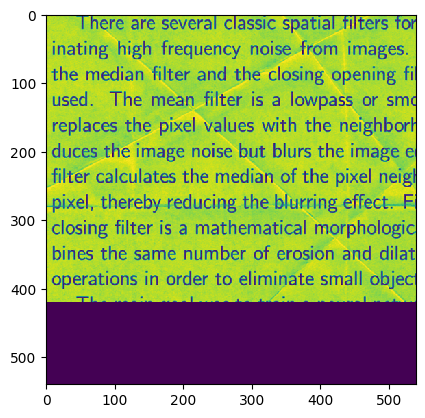

In [127]:
plt.imshow(k, interpolation='nearest')
plt.show()

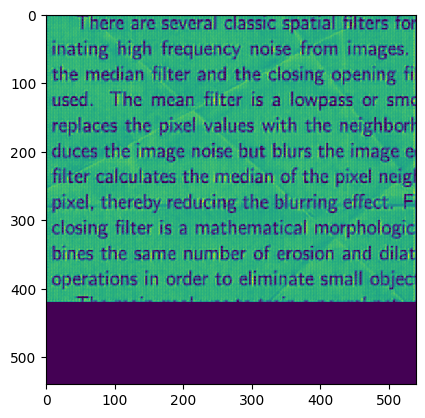

In [128]:
plt.imshow(t, interpolation='nearest')
plt.show()